In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [2]:
mean_1= np.array([1,2])

In [16]:
cov_1=np.array([[1,0.2],[0.2,1]])
mean_2=np.array([5,6])
cov_2=np.array([[1,0.2],[0.2,1]])

In [17]:
dist_1=np.random.multivariate_normal(mean_1,cov_1,500)
dist_2=np.random.multivariate_normal(mean_2,cov_2,500) 

In [18]:
print(dist_1.shape,dist_2.shape)

(500, 2) (500, 2)


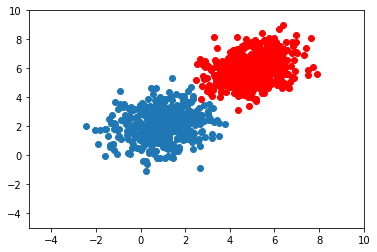

In [20]:
plt.figure(0)
plt.xlim(-5,10)
plt.ylim(-5,10)

plt.scatter(dist_1[:, 0],dist_1[:, 1])
plt.scatter(dist_2[:, 0],dist_2[:, 1], color='red')
plt.show()

In [21]:
r=dist_1.shape[0]+dist_2.shape[0]
c=dist_1.shape[1]+1
data=np.zeros((r,c))
print(data.shape)

data[:dist_1.shape[0], :2]=dist_1
data[dist_1.shape[0]:, :2]=dist_2
data[dist_1.shape[0]:, -1]=1.0

(1000, 3)


In [22]:
np.random.shuffle(data)
print(data[:50])

[[ 5.02316636  4.50896697  1.        ]
 [ 0.60897269  1.47346144  0.        ]
 [ 4.84344051  5.88255876  1.        ]
 [ 3.89579494  6.31857855  1.        ]
 [ 0.86149751  2.71493157  0.        ]
 [ 6.28773295  6.58367097  1.        ]
 [ 4.0536452   7.07983572  1.        ]
 [ 3.22321196  1.48363291  0.        ]
 [ 4.63897086  6.71302362  1.        ]
 [ 5.46730741  5.96589477  1.        ]
 [ 4.72171429  5.80923892  1.        ]
 [ 0.68577341  4.6582686   0.        ]
 [ 0.4580779   2.10492003  0.        ]
 [ 3.73179532  6.15002576  1.        ]
 [-0.31832852  3.1308128   0.        ]
 [ 6.40309825  5.84347164  1.        ]
 [ 4.85969387  5.52119183  1.        ]
 [-0.13399804  0.5118228   0.        ]
 [ 5.26302944  7.26329518  1.        ]
 [ 3.5954654   4.72099757  1.        ]
 [ 6.11505434  7.45598152  1.        ]
 [ 2.07446827  3.39536617  0.        ]
 [ 3.77459857  4.85915404  1.        ]
 [ 5.12056671  7.92678947  1.        ]
 [ 1.33516937  0.47553675  0.        ]
 [ 5.12967372  5.11765368

In [23]:
split= int(0.8*data.shape[0])

X_train=data[:split, :-1]
X_test=data[split:, :-1]

Y_train=data[:split,-1]
Y_test=data[split:,-1]

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [28]:
def hypothesis(x,w,b):
    h=(w*x).sum()+b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0 * z))

def get_error(y_true,x,w,b):
    err=0.0
    
    m=x.shape[0]
    for i in range(m):
        if y_true[i] == 1:
            err+= -1.0*np.log2(hypothesis(x[i],w,b))
        else:
            err+= -1.0*np.log2(1.0-hypothesis(x[i],w,b))
    err/=m
    return err

def get_grads(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    
    m=x.shape[0]
    
    for ix in range(m):
        grad_w+= (y_true[ix]- hypothesis(x[ix],w,b))*(x[ix])*(-1)
        grad_b+= (y_true[ix]- hypothesis(x[ix],w,b))*(-1)
    
    grad_w/=m
    grad_b/=m
    return[grad_w,grad_b]

def grad_descent(x,y_true,w,b,learning_rates=0.1):
    error=get_error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    b = b - learning_rates*grad_b
    w = w - learning_rates*grad_w
    
    return error, w, b

In [29]:
def predict(x,w,b):
    prob=hypothesis(x,w,b)
    
    if prob<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,B):
    y_pred=[]
    for ix in range(y_tst.shape[0]):
        y_pred.append(predict(x_tst[ix],w,b))
    y_pred=np.asarray(y_pred)
    return float((y_pred==y_tst).sum()/y_tst.shape[0])

In [30]:
loss=[]
acc=[]
W=np.random.random((X_train.shape[1],))
b=np.random.random()


In [31]:
for ix in range(100):
    l,W,b=grad_descent(X_train, Y_train,W,b,learning_rates=0.5)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)
    

In [ ]:
plt.figure(0)
plt.plot(loss)

plt.figure(1)
plt.plot(acc)